In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

#### 백분위수 및 사분위수 계산

- 백분위수 : np.percentile(x, q) # q: 위치 (0~100)
- 사분위수 : np.quantile(x, q) # q: 위치 (0~1)

In [3]:
x = np.arange(1, 12, 1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [4]:
# 하위 10% 위치
print(np.percentile(x, 10))
print(np.quantile(x, 0.1)) # 사실상 같음

2.0
2.0


In [4]:
print(np.percentile(x, 25))
print(np.quantile(x, 0.25)) # 사실상 같음

3.5
3.5


여기서 중요한게, 실제 3.5라는 값을 리스트 안에 없음. 해당 위치의 점을 찍어주는 것. 데이터 중에 해당 숫자가 없을 수 있음. 

#### 왜도 계산


- scipy.stats.skew(x)
- Series(x).skew()

![01_03.png](../materials/01_03.png)

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

In [8]:
x1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [9]:
pd.Series(x1).value_counts(sort = False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

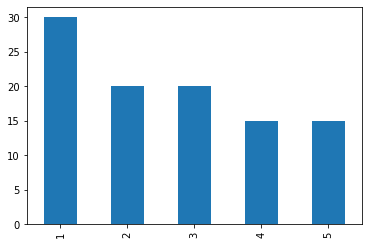

In [9]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

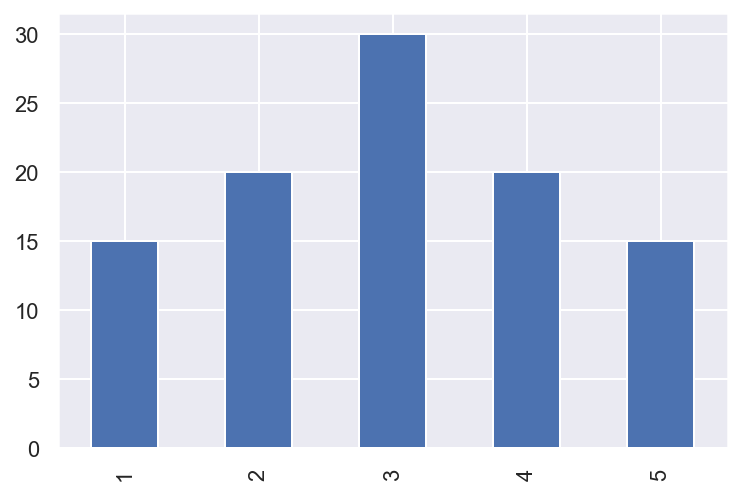

In [10]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

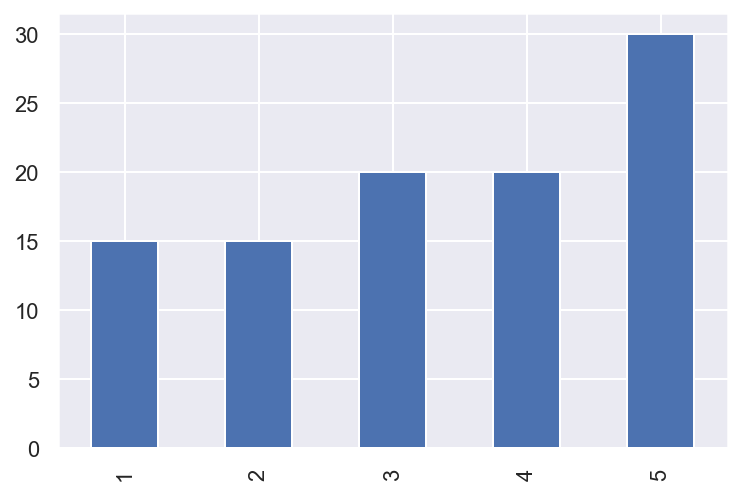

In [11]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [12]:
print("좌로 치우쳤을 때 왜도:", skew(x1))
print("치우치지 않았을 때 왜도:", skew(x2))
print("우로 치우친 왜도:", skew(x3))

좌로 치우쳤을 때 왜도: 0.3192801008486361
치우치지 않았을 때 왜도: 0.0
우로 치우친 왜도: -0.31928010084863606


#### 첨도 계산

- scipy.stats.kurtosis(x)
- Series(x).kurtosis()

![01_03.png](../materials/01_04.png)

In [12]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

<AxesSubplot:>

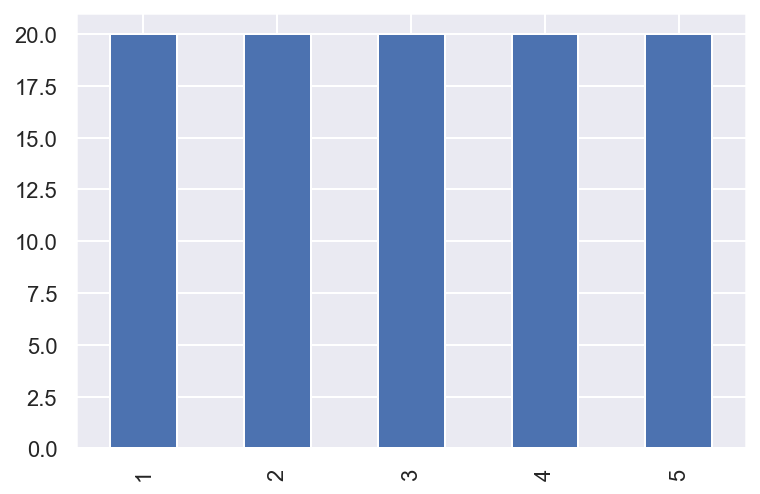

In [13]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

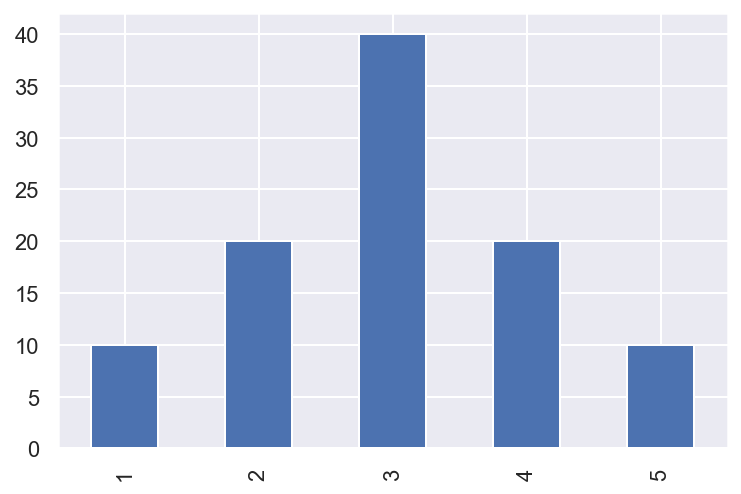

In [14]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

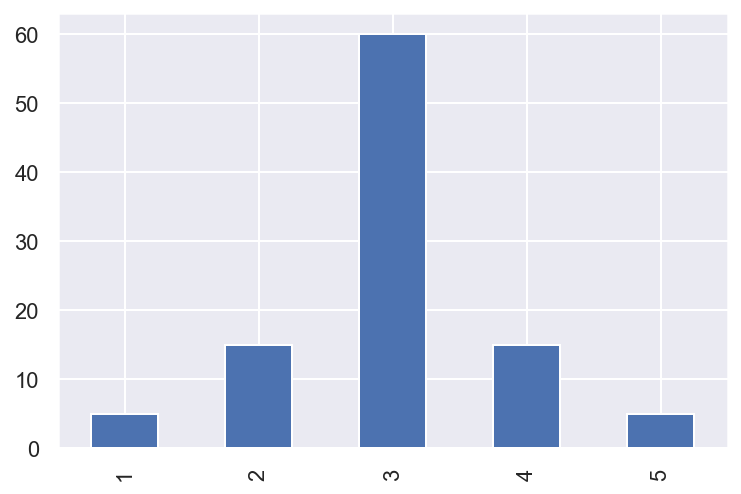

In [15]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [16]:
print("전혀 뾰족하지 않을 때 (평평할 때) 첨도:", kurtosis(x1))
print("조금 뾰족할 때 첨도:", kurtosis(x2))
print("매우 뾰족할 때 첨도:", kurtosis(x3))

전혀 뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.8775510204081636
